<a href="https://colab.research.google.com/github/Pam-Pam29/ADVANCED-LINEAR-ALGEBRA-PCA-Group-19/blob/main/Template_PCA_Formative_1%5B19%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [ ]:

!pip install kaggle


def setup_kaggle():
    from google.colab import files
    print("Please upload your kaggle.json file:")
    uploaded = files.upload()

    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle setup complete!")

def download_dataset():
    !kaggle datasets download -d "waalbannyantudre/african-cigarette-prices"
    !unzip "african-cigarette-prices.zip"
    !ls -la
    print("Dataset downloaded and extracted!")

setup_kaggle()

download_dataset()

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle setup complete!
Dataset URL: https://www.kaggle.com/datasets/waalbannyantudre/african-cigarette-prices
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/6.54M [00:00<?, ?B/s]
100% 6.54M/6.54M [00:00<00:00, 779MB/s]
Archive:  african-cigarette-prices.zip
  inflating: acp-r1-r12-2016-2022-v1.6.csv  
total 51560
drwxr-xr-x 1 root root     4096 Jun  9 14:05 .
drwxr-xr-x 1 root root     4096 Jun  9 14:04 ..
-rw-r--r-- 1 root root 45921402 Feb 28  2024 acp-r1-r12-2016-2022-v1.6.csv
-rw-r--r-- 1 root root  6854964 Feb 28  2024 african-cigarette-prices.zip
drwxr-xr-x 4 root root     4096 Jun  5 13:38 .config
drwxr-xr-x 1 root root     4096 Jun  5 13:38 sample_data
Dataset downloaded and extracted!


In [6]:
import pandas as pd

encodings_to_try = ['latin-1', 'iso-8859-1', 'cp1252', 'utf-8-sig']

df = None
for encoding in encodings_to_try:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('acp-r1-r12-2016-2022-v1.6.csv', encoding=encoding)
        print(f"✅ Success with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"❌ Failed with {encoding}: {str(e)[:100]}...")
        continue

if df is not None:
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    df.head()
else:
    print("All encodings failed. Let's try a different approach.")

Trying encoding: latin-1
✅ Success with encoding: latin-1
Dataset loaded successfully!
Shape: (215449, 28)
Columns: ['Store_ID', 'Round', 'Fieldworker_Code', 'Country', 'Currency', 'Day', 'Month', 'Year', 'Date', 'Province', 'City', 'Suburb', 'Outlet_Type', 'Retail_Subtype', 'Outlet_Name', 'Product', 'Brand', 'Sub_Brand', 'Quantity', 'Unusual_Quantity_Flg', 'Local_Price', 'Local_Price_Per_Stick_Cigarette', 'Dollar_Exchange_Rate', 'Dollar_Price', 'Dollar_Price_Per_Stick_Cigarett', 'Dollar_Price_Pack_Cigarettes', 'Fieldworker_Comment', 'Data_Cleaner_Comment']


<ipython-input-6-44a4e360f37a>:9: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('acp-r1-r12-2016-2022-v1.6.csv', encoding=encoding)


In [7]:
df.head()

,Store_ID,Round,Fieldworker_Code,Country,Currency,Day,Month,Year,Date,Province,...,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes,Fieldworker_Comment,Data_Cleaner_Comment
0,123.0,1,F,Lesotho,LSL,18.0,1.0,2016.0,18jan2016,Lowlands,...,1.0,0.0,2.50,2.5000,16.3,0.153374,0.153374,3.067485,NaN,NaN
1,51.0,1,B,Namibia,NAD,18.0,1.0,2016.0,18jan2016,Khomas,...,20.0,0.0,20.00,1.0000,16.3,1.226994,0.061350,1.226994,NaN,NaN
2,51.0,1,B,Namibia,NAD,18.0,1.0,2016.0,18jan2016,Khomas,...,20.0,0.0,36.99,1.8495,16.3,2.269325,0.113466,2.269325,NaN,NaN
3,52.0,1,B,Namibia,NAD,19.0,1.0,2016.0,19jan2016,Khomas,...,20.0,0.0,37.00,1.8500,16.3,2.269939,0.113497,2.269939,NaN,NaN
4,33.0,1,A,Uganda,UGX,22.0,1.0,2016.0,22jan2016,Central Uganda,...,20.0,0.0,3500.00,175.0000,3440.9,1.017176,0.050859,1.017176,NaN,NaN


In [8]:
numerical_columns = df.select_dtypes(include=np.number).columns
dataset = df[numerical_columns]
dataset.head()

,Day,Month,Year,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes
0,18.0,1.0,2016.0,1.0,0.0,2.50,2.5000,16.3,0.153374,0.153374,3.067485
1,18.0,1.0,2016.0,20.0,0.0,20.00,1.0000,16.3,1.226994,0.061350,1.226994
2,18.0,1.0,2016.0,20.0,0.0,36.99,1.8495,16.3,2.269325,0.113466,2.269325
3,19.0,1.0,2016.0,20.0,0.0,37.00,1.8500,16.3,2.269939,0.113497,2.269939
4,22.0,1.0,2016.0,20.0,0.0,3500.00,175.0000,3440.9,1.017176,0.050859,1.017176


In [21]:
print("Original dataset shape:", dataset.shape)
print("Missing values per column:")
print(dataset.isnull().sum())

# Clean the data by removing rows with missing values
dataset_clean = dataset.dropna()
print(f"\nCleaned dataset shape: {dataset_clean.shape}")
print(f"Rows removed: {dataset.shape[0] - dataset_clean.shape[0]}")


Original dataset shape: (215449, 11)
Missing values per column:
Day                                  472
Month                                 12
Year                                  12
Quantity                             201
Unusual_Quantity_Flg                 190
Local_Price                          193
Local_Price_Per_Stick_Cigarette     1600
Dollar_Exchange_Rate                 190
Dollar_Price                         194
Dollar_Price_Per_Stick_Cigarett     1600
Dollar_Price_Pack_Cigarettes       14898
dtype: int64

Cleaned dataset shape: (200089, 11)
Rows removed: 15360


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

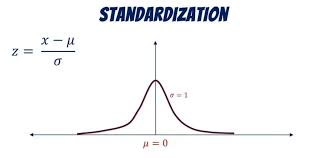


In [22]:
data_mean = np.mean(dataset_clean, axis=0)
print (data_mean)
data_std = np.std(dataset_clean, axis=0)
print (data_std)

Day                                  16.421048
Month                                 6.484409
Year                               2019.279970
Quantity                             17.041542
Unusual_Quantity_Flg                  0.009741
Local_Price                          82.159411
Local_Price_Per_Stick_Cigarette       6.753949
Dollar_Exchange_Rate                 69.535388
Dollar_Price                          1.568229
Dollar_Price_Per_Stick_Cigarett       0.157943
Dollar_Price_Pack_Cigarettes          2.880643
dtype: float64
Day                                  8.709809
Month                                3.878163
Year                                 1.702706
Quantity                            49.566960
Unusual_Quantity_Flg                 0.098213
Local_Price                        409.049049
Local_Price_Per_Stick_Cigarette     28.016712
Dollar_Exchange_Rate               308.526407
Dollar_Price                         6.897188
Dollar_Price_Per_Stick_Cigarett      0.720180
Dollar_P

In [23]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = (dataset_clean - data_mean) / data_std
standardized_data[:10]

,Day,Month,Year,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes
0,0.181284,-1.414177,-1.926328,-0.323634,-0.099179,-0.194743,-0.151836,-0.172547,-0.205135,-0.006344,0.012894
1,0.181284,-1.414177,-1.926328,0.059686,-0.099179,-0.151961,-0.205376,-0.172547,-0.049475,-0.134124,-0.114119
2,0.181284,-1.414177,-1.926328,0.059686,-0.099179,-0.110425,-0.175054,-0.172547,0.101650,-0.061758,-0.042187
3,0.296097,-1.414177,-1.926328,0.059686,-0.099179,-0.110401,-0.175037,-0.172547,0.101739,-0.061715,-0.042145
4,0.640537,-1.414177,-1.926328,0.059686,-0.099179,8.355576,6.005203,10.927313,-0.079895,-0.148691,-0.128599
5,0.181284,-1.414177,-1.926328,0.059686,-0.099179,-0.110401,-0.175037,-0.172547,0.101739,-0.061715,-0.042145
6,-0.048342,-1.414177,-1.926328,-0.323634,-0.099179,-0.193521,-0.133990,-0.172547,-0.200688,0.036249,0.055232
7,-0.163155,-1.414177,-1.926328,-0.142061,-0.099179,-0.142060,-0.155227,-0.188105,0.075839,0.071076,0.089849
8,0.870163,-1.414177,-1.926328,0.059686,-0.099179,-0.107956,-0.173252,-0.172547,0.110633,-0.057456,-0.037911
9,0.640537,-1.414177,-1.926328,0.059686,-0.099179,16.912008,12.251475,10.927313,0.067582,-0.078072,-0.058403


In [24]:
# Check standardization
print("Means (should be ~0):")
print(standardized_data.mean())
print("\nStandard deviations (should be ~1):")
print(standardized_data.std())

Means (should be ~0):
Day                                1.681817e-16
Month                              1.088067e-16
Year                              -4.110451e-14
Quantity                           2.613634e-17
Unusual_Quantity_Flg              -3.096588e-17
Local_Price                        1.988635e-17
Local_Price_Per_Stick_Cigarette   -3.693179e-17
Dollar_Exchange_Rate              -2.073862e-17
Dollar_Price                      -1.136363e-18
Dollar_Price_Per_Stick_Cigarett   -5.113632e-18
Dollar_Price_Pack_Cigarettes      -2.329544e-17
dtype: float64

Standard deviations (should be ~1):
Day                                1.000002
Month                              1.000002
Year                               1.000002
Quantity                           1.000002
Unusual_Quantity_Flg               1.000002
Local_Price                        1.000002
Local_Price_Per_Stick_Cigarette    1.000002
Dollar_Exchange_Rate               1.000002
Dollar_Price                       1.000002
Do

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [27]:
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix.shape
cov_matrix

array([[ 1.00000500e+00,  2.09379616e-02,  8.04256590e-02,
         8.16684482e-03, -1.09116518e-02,  3.78722069e-02,
         4.82485302e-02,  4.83637562e-02, -5.85277458e-04,
        -9.60774084e-03, -1.28481216e-02],
       [ 2.09379616e-02,  1.00000500e+00, -2.81386363e-01,
        -7.94773151e-03, -3.12307141e-02, -5.18080863e-02,
        -7.75360863e-02, -7.71136262e-02, -5.63274709e-04,
         7.94448662e-03,  4.86951302e-03],
       [ 8.04256590e-02, -2.81386363e-01,  1.00000500e+00,
         4.06254370e-02, -3.69579639e-03,  4.84534009e-02,
         8.89454798e-02,  3.60649548e-02,  3.74716111e-02,
         6.24645496e-02,  6.24507895e-02],
       [ 8.16684482e-03, -7.94773151e-03,  4.06254370e-02,
         1.00000500e+00,  5.47743237e-02,  9.31742899e-02,
        -2.37263618e-02, -1.44512350e-02,  2.20848593e-01,
        -1.87050600e-02,  7.37171922e-03],
       [-1.09116518e-02, -3.12307141e-02, -3.69579639e-03,
         5.47743237e-02,  1.00000500e+00, -2.42362287e-03,
  

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("Eigenvalues:", eigenvalues)
print("Eigenvector:", eigenvectors)

Eigenvalues shape: (11,)
Eigenvectors shape: (11, 11)
Eigenvalues: [2.65028429 1.94926496 0.00607058 0.10047893 0.36457831 1.28091966
 1.20696228 1.02302154 0.98126966 0.74502136 0.69218342]
Eigenvector: [[-3.85555062e-02 -5.42198248e-02  2.24890733e-03  4.32772204e-03
  -1.43860557e-02  1.10222990e-01  4.57659570e-02 -7.79420345e-01
  -5.63742090e-01  6.31652011e-02 -2.27614249e-01]
 [ 7.45461957e-02  7.03110827e-02  2.40660885e-03  2.78390316e-05
   3.07102829e-02 -5.97927222e-01 -3.37579010e-01 -2.18575304e-01
  -1.35125764e-01 -1.23590775e-01  6.60124939e-01]
 [-9.85050928e-02  8.30797331e-03  9.11959329e-04  2.51999433e-02
   5.79006659e-03  6.35464187e-01  2.99300028e-01 -1.16863371e-01
   2.75797324e-02 -1.00105112e-01  6.86821933e-01]
 [-3.09881016e-02  1.44667273e-02 -1.81328320e-02 -1.19159698e-02
   8.55175549e-02  3.44117217e-01 -6.45972331e-01 -3.61863890e-02
   4.84824884e-02 -6.56139032e-01 -1.45502792e-01]
 [ 3.49494434e-03 -1.49110383e-02 -3.42981071e-04 -1.44071530e-0

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
